In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Plot style
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (8, 5)


In [15]:
from google.colab import files
uploaded = files.upload()  # Choose Iris.csv and netflix_titles.csv

iris = pd.read_csv("Iris.csv")
netflix = pd.read_csv("netflix_titles.csv")  # If too large, filter columns later

Saving Iris.csv to Iris (1).csv
Saving netflix_titles.csv to netflix_titles (1).csv


ParserError: Error tokenizing data. C error: Expected 12 fields in line 2658, saw 14


In [16]:
iris = sns.load_dataset("iris")
# Rename columns to match your CSV style (optional)
iris = iris.rename(columns={
    "sepal_length": "SepalLengthCm",
    "sepal_width": "SepalWidthCm",
    "petal_length": "PetalLengthCm",
    "petal_width": "PetalWidthCm",
    "species": "Species"
})

In [17]:
def quick_overview(df, name="Dataset"):
    print(f"=== {name} | Shape ===")
    print(df.shape)
    print("\n=== Head ===")
    print(df.head())
    print("\n=== Info ===")
    print(df.info())
    print("\n=== Missing values ===")
    print(df.isnull().sum())
    print("\n=== Duplicates ===")
    print(df.duplicated().sum())

quick_overview(iris, "Iris")
# For Netflix, if loaded:
# quick_overview(netflix, "Netflix")

=== Iris | Shape ===
(150, 5)

=== Head ===
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm Species
0            5.1           3.5            1.4           0.2  setosa
1            4.9           3.0            1.4           0.2  setosa
2            4.7           3.2            1.3           0.2  setosa
3            4.6           3.1            1.5           0.2  setosa
4            5.0           3.6            1.4           0.2  setosa

=== Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

=== Missing values ===
SepalLengthCm    0
SepalWidthCm     0
Pet

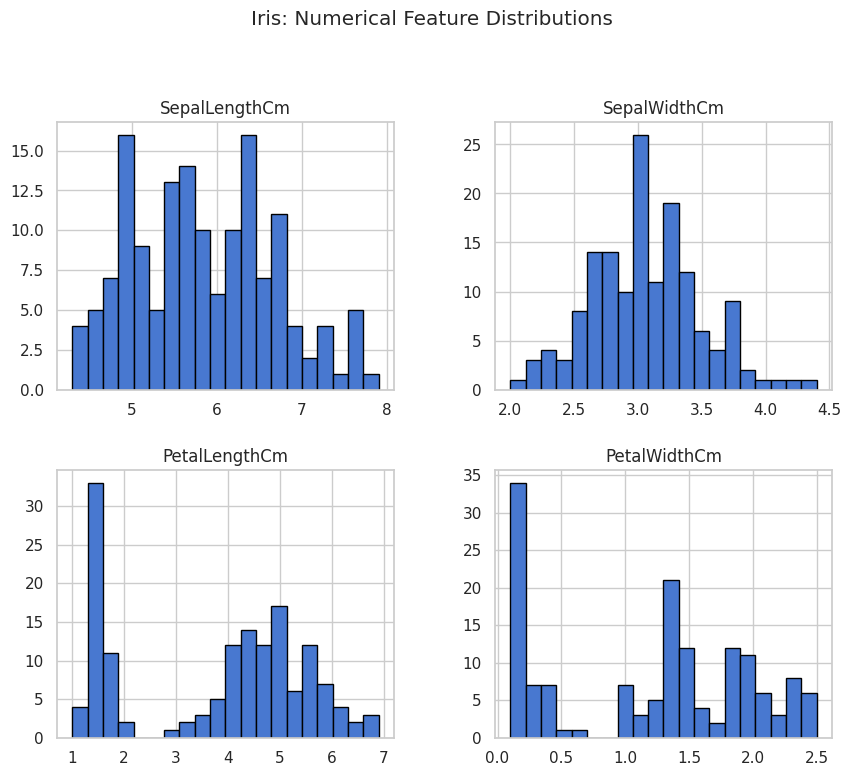

In [18]:
num_cols_iris = ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]
iris[num_cols_iris].hist(bins=20, figsize=(10, 8), edgecolor="black")
plt.suptitle("Iris: Numerical Feature Distributions", y=1.02)
plt.show()

In [19]:
# If netflix is large, select key columns
cat_cols_netflix = ["type", "rating", "country"]
for col in cat_cols_netflix:
    if col in netflix.columns:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=netflix, x=col, order=netflix[col].value_counts().index[:15])
        plt.title(f"Netflix: {col} distribution (Top 15)")
        plt.xticks(rotation=45)
        plt.show()

NameError: name 'netflix' is not defined

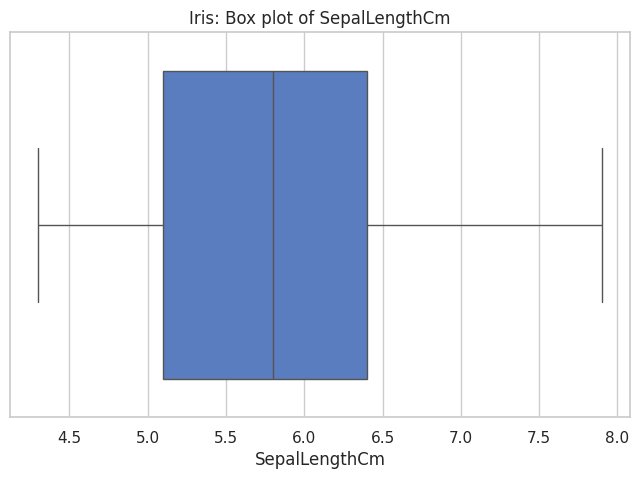

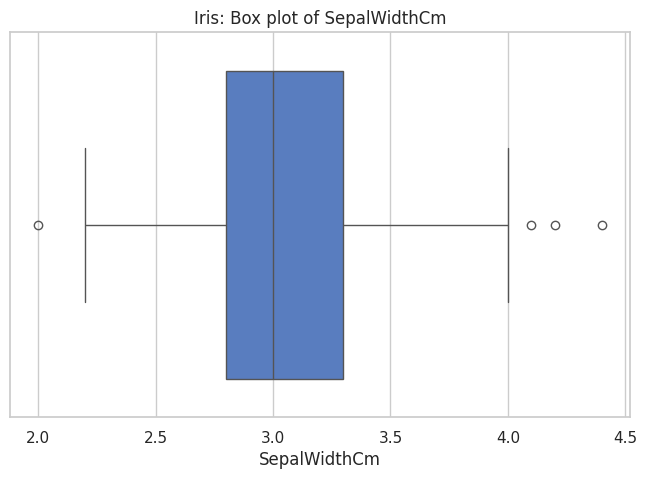

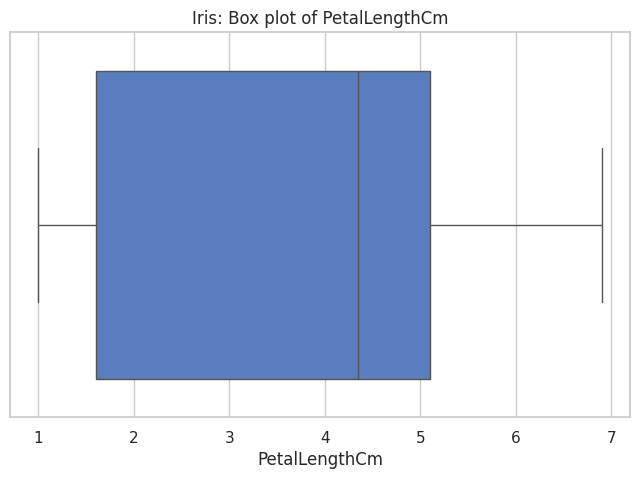

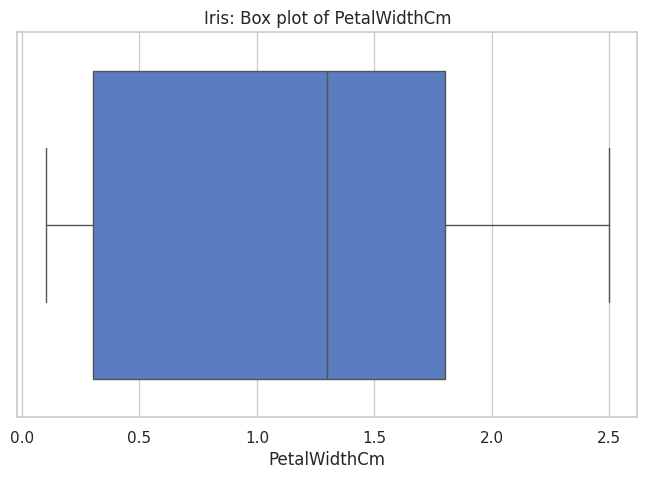

In [20]:
for col in num_cols_iris:
    plt.figure()
    sns.boxplot(data=iris, x=col)
    plt.title(f"Iris: Box plot of {col}")
    plt.show()

In [21]:
# Convert duration to numeric (minutes for Movies)
if "duration" in netflix.columns:
    # Create numeric duration column
    netflix["duration_num"] = netflix["duration"].str.extract(r'(\d+)').astype(float)
    plt.figure()
    sns.boxplot(data=netflix[netflix["type"]=="Movie"], x="duration_num")
    plt.title("Netflix: Movie duration (minutes) — Box plot")
    plt.show()

NameError: name 'netflix' is not defined

its too large to fetch netflix file

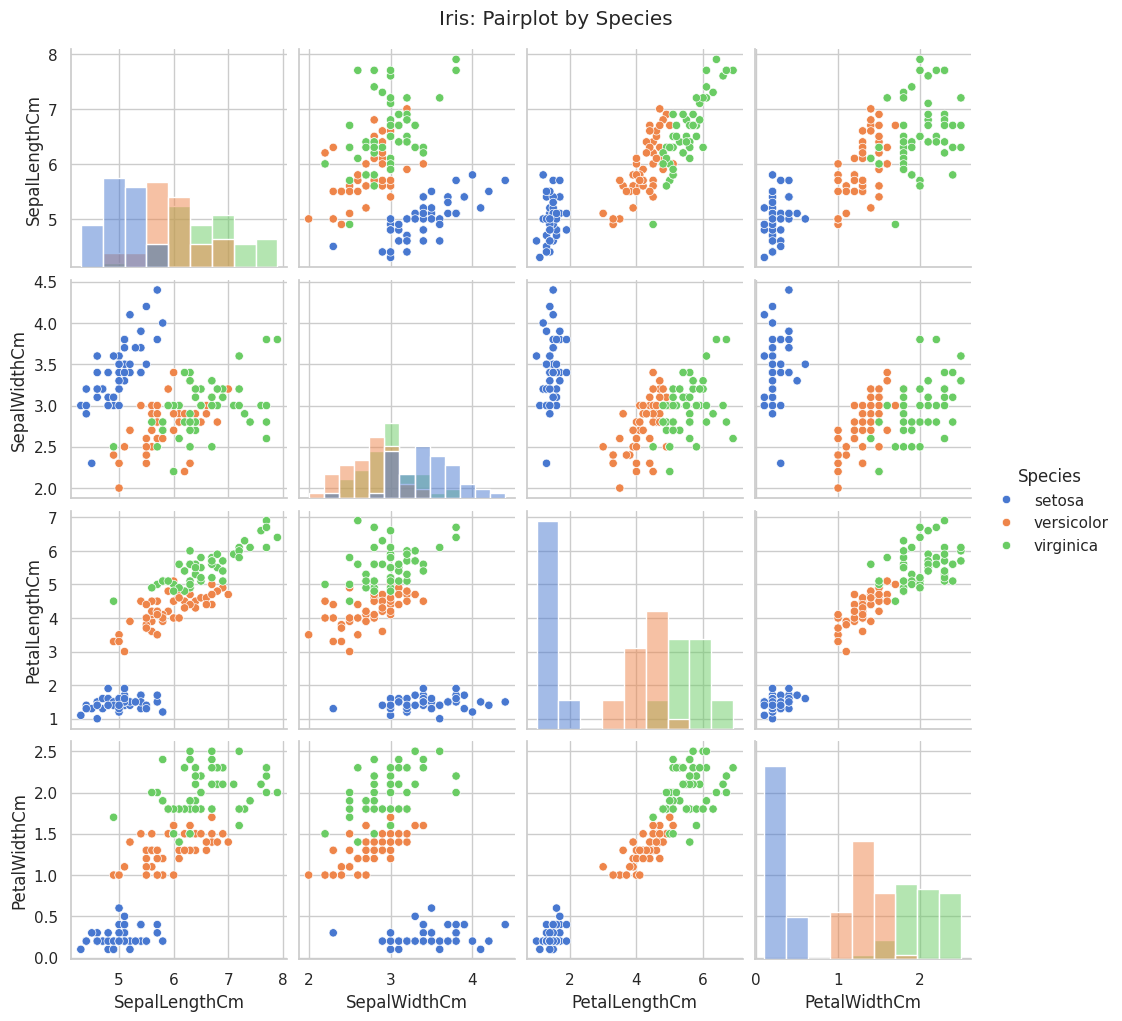

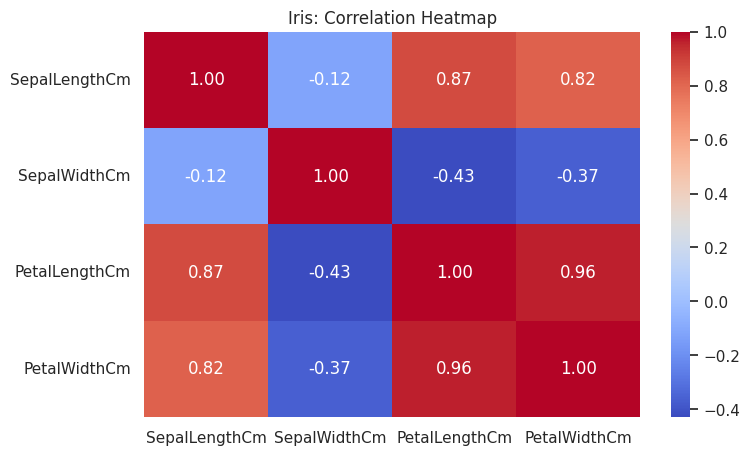

In [22]:
sns.pairplot(iris, hue="Species", diag_kind="hist")
plt.suptitle("Iris: Pairplot by Species", y=1.02)
plt.show()

corr_iris = iris[num_cols_iris].corr()
sns.heatmap(corr_iris, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Iris: Correlation Heatmap")
plt.show()

In [24]:
num_cols_netflix = ["release_year", "duration_num"]
num_cols_netflix = [c for c in num_cols_netflix if c in netflix.columns]
if num_cols_netflix:
    corr_netflix = netflix[num_cols_netflix].corr()
    sns.heatmap(corr_netflix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Netflix_titles: Correlation Heatmap (numeric)")
    plt.show()

NameError: name 'netflix' is not defined

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

# Encode species
le = LabelEncoder()
y = le.fit_transform(iris["Species"])
X = iris[num_cols_iris]

# Fit model
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

importance = pd.Series(model.coef_.mean(axis=0), index=num_cols_iris).abs().sort_values(ascending=False)
print("Iris: Approximate feature importance (Logistic Regression, absolute mean coefficients)")
print(importance)

Iris: Approximate feature importance (Logistic Regression, absolute mean coefficients)
SepalWidthCm     3.293662e-15
PetalWidthCm     3.256654e-15
SepalLengthCm    3.196517e-15
PetalLengthCm    2.960595e-15
dtype: float64


In [29]:
# Create a folder to save figures
import os
os.makedirs("figures", exist_ok=True)

# Example: save a heatmap
sns.heatmap(corr_iris, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Iris: Correlation Heatmap")
plt.savefig("figures/iris_correlation_heatmap.png", bbox_inches="tight")
plt.close()

# Save insights to a markdown file
insights = """
# Visual Insights Report

## Iris
- Petal features separate species clearly.
- PetalLength–PetalWidth strongly correlated; good predictors.
- Sepal features overlap; lower predictive power.

## Netflix
- Movies dominate content type.
- Ratings and countries are skewed; consider grouping.
- Duration has outliers; consider capping or transformation.
"""
with open("Visual_Insights_Report.md", "w") as f:
    f.write(insights)

# Save processed datasets (optional)
iris.to_csv("iris_processed.csv", index=False)
if "duration_num" in netflix.columns:
    netflix_titles.csv.to_csv("netflix_processed.csv", index=False)

NameError: name 'netflix' is not defined

In [30]:
netflix = pd.read_csv("netflix_titles.csv", usecols=["type","title","release_year","rating","country","duration"])

In [31]:
netflix = pd.read_csv("netflix_titles.csv", low_memory=False)

ParserError: Error tokenizing data. C error: Expected 12 fields in line 2658, saw 14


In [32]:
netflix = pd.read_csv("netflix_titles.csv", error_bad_lines=False, warn_bad_lines=True)

TypeError: read_csv() got an unexpected keyword argument 'error_bad_lines'

In [33]:
import pandas as pd

# Robust loading with Python engine and skipping bad lines
netflix = pd.read_csv(
    "netflix_titles.csv",
    engine="python",          # more tolerant parser
    on_bad_lines="skip",      # skip problematic rows
    encoding="utf-8"          # handle special characters
)

print(netflix.shape)
print(netflix.head())

(11562, 12)
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added release_year rating   duration  \
0  September 25, 2021         2020  PG-13     90 min   
1  September 24, 2021         2021  TV-MA  2 Seasons   
2  September 24, 202

In [35]:
print(netflix.shape)
print(netflix.info())
print(netflix.head())
print(netflix.isnull().sum())

(11562, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11562 entries, 0 to 11561
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       11562 non-null  object
 1   type          11562 non-null  object
 2   title         11561 non-null  object
 3   director      8294 non-null   object
 4   cast          10484 non-null  object
 5   country       10589 non-null  object
 6   date_added    11542 non-null  object
 7   release_year  11561 non-null  object
 8   rating        11553 non-null  object
 9   duration      11554 non-null  object
 10  listed_in     11560 non-null  object
 11  description   11559 non-null  object
dtypes: object(12)
memory usage: 1.1+ MB
None
  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq 

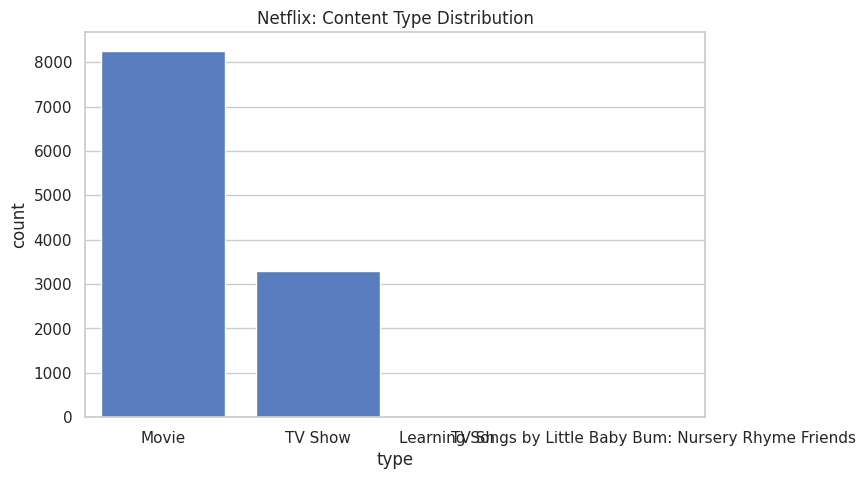

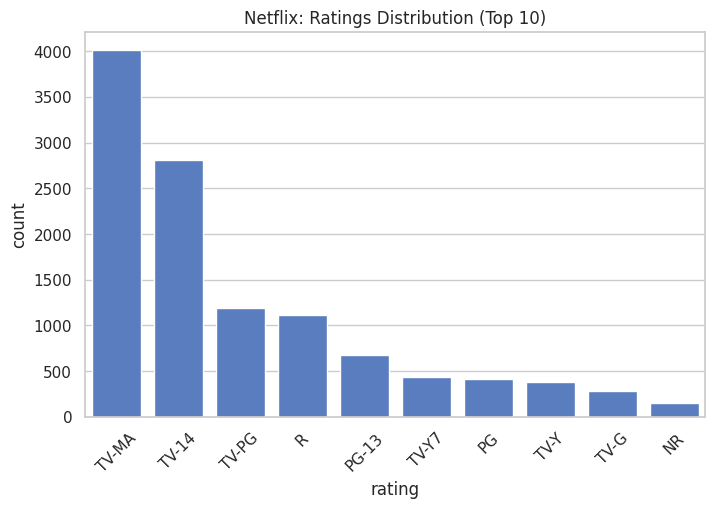

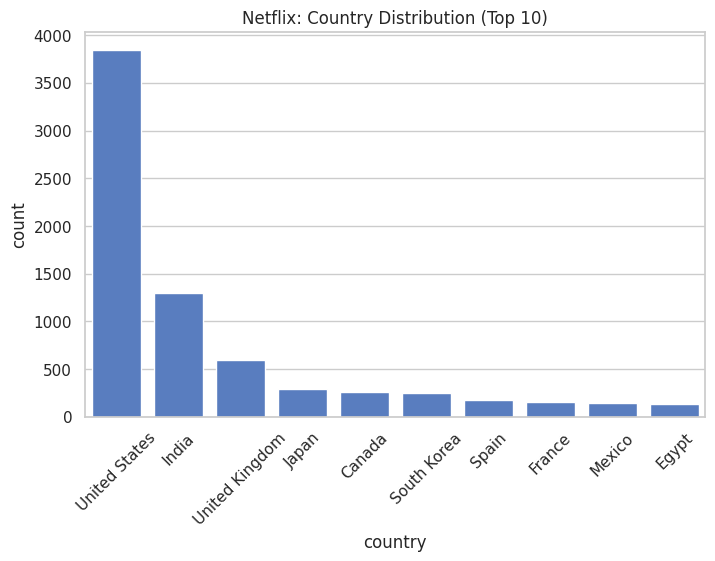

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Type (Movie vs TV Show)
sns.countplot(data=netflix, x="type", order=netflix["type"].value_counts().index)
plt.title("Netflix: Content Type Distribution")
plt.show()

# Ratings (Top 10)
sns.countplot(data=netflix, x="rating", order=netflix["rating"].value_counts().index[:10])
plt.title("Netflix: Ratings Distribution (Top 10)")
plt.xticks(rotation=45)
plt.show()

# Country (Top 10)
sns.countplot(data=netflix, x="country", order=netflix["country"].value_counts().index[:10])
plt.title("Netflix: Country Distribution (Top 10)")
plt.xticks(rotation=45)
plt.show()

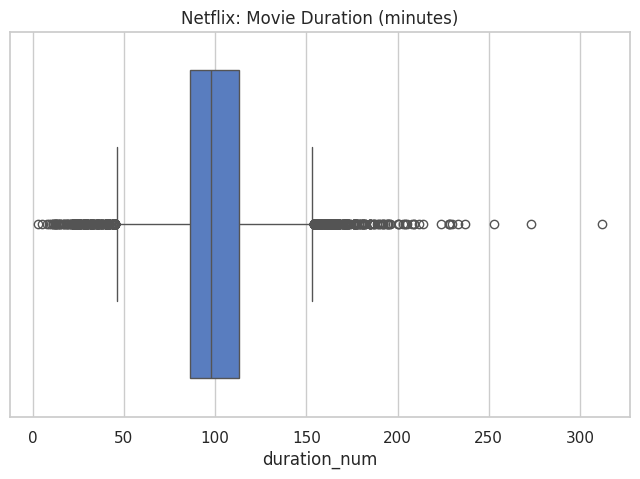

In [37]:
# Extract numeric duration (minutes for Movies, seasons for TV Shows)
netflix["duration_num"] = netflix["duration"].str.extract(r'(\d+)').astype(float)

# Boxplot for Movie durations
sns.boxplot(data=netflix[netflix["type"]=="Movie"], x="duration_num")
plt.title("Netflix: Movie Duration (minutes)")
plt.show()

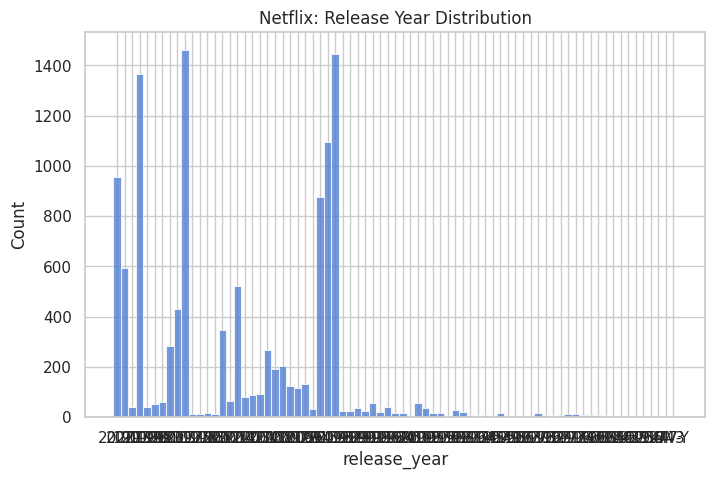

In [38]:
sns.histplot(data=netflix, x="release_year", bins=30, kde=False)
plt.title("Netflix: Release Year Distribution")
plt.show()

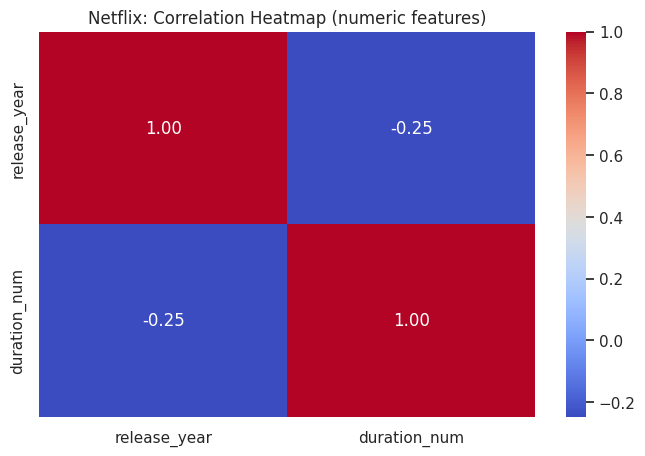

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
num_cols = ["release_year", "duration_num"]

# Drop rows with NaN values in these columns
netflix_num = netflix[num_cols].dropna()

# Convert to numeric (just in case)
netflix_num = netflix_num.apply(pd.to_numeric, errors="coerce")

# Compute correlation
corr = netflix_num.corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Netflix: Correlation Heatmap (numeric features)")
plt.show()